# DF setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sdaPath = r"C:\Users\mdasse\OneDrive - UCL\PhD\Writings\Master Thesis Paper\Revised version submission\Results\SDA.csv"
sdaDF = pd.read_csv(sdaPath, dtype={'Run' : str}, index_col="Run")

opPath = r"C:\Users\mdasse\OneDrive - UCL\PhD\Writings\Master Thesis Paper\Revised version submission\Results\OP V3.csv"
opDF = pd.read_csv(opPath, dtype={'Run' : str}, index_col="Run")

embPath = r"C:\Users\mdasse\OneDrive - UCL\PhD\Writings\Master Thesis Paper\Revised version submission\Results\EMB.csv"
embDF = pd.read_csv(embPath, dtype={'Run' : str}, index_col="Run")

In [3]:
sdaDF['Area [m²]'] = opDF['Area [m²]']
sdaDF['Occupancy [/]'] = opDF['Occupancy [/]']

for i in range(0, len(sdaDF), 3):
    if i + 1 < len(sdaDF):
        sdaDF.iloc[i + 1, sdaDF.columns.get_indexer(['SDA25 [%]', 'SDA50 [%]', 'SDA75 [%]'])] = np.nan
    if i + 2 < len(sdaDF):
        sdaDF.iloc[i + 2, sdaDF.columns.get_indexer(['SDA25 [%]', 'SDA50 [%]', 'SDA75 [%]'])] = np.nan

sdaDF[['SDA25 [%]', 'SDA50 [%]', 'SDA75 [%]']] = sdaDF[['SDA25 [%]', 'SDA50 [%]', 'SDA75 [%]']] * 100

sdaDF['Geometric Density [/]'] = round((sdaDF['Width [m]'] *2 +2) / (sdaDF['Length [m]'] *8), 3)
sdaDF['Occupancy Density [m²/capita]'] = round(sdaDF['Area [m²]']/sdaDF['Occupancy [/]'],3)

filled_sdaDF = sdaDF.ffill(axis=0)
cleaned_sdaDF = sdaDF[sdaDF["SDA25 [%]"].notna()]
print(len(sdaDF), len(cleaned_sdaDF))
filled_sdaDF

972 324


,Length [m],Width [m],WWR [/],Layout [/],Orientation [/],SDA25 [%],SDA50 [%],SDA75 [%],Area [m²],Occupancy [/],Geometric Density [/],Occupancy Density [m²/capita]
Run,,,,,,,,,,,,
000000,2.9,3.4,0.3,0,0,70.7161,50.3836,21.8670,204.16,16,0.379,12.76
000001,2.9,3.4,0.3,0,0,70.7161,50.3836,21.8670,204.16,16,0.379,12.76
000002,2.9,3.4,0.3,0,0,70.7161,50.3836,21.8670,204.16,16,0.379,12.76
000010,2.9,3.4,0.3,0,1,69.5652,49.4885,21.0997,204.16,16,0.379,12.76
000011,2.9,3.4,0.3,0,1,69.5652,49.4885,21.0997,204.16,16,0.379,12.76
...,...,...,...,...,...,...,...,...,...,...,...,...
222221,5.4,6.6,0.5,2,2,65.6589,52.5969,33.0233,656.64,144,0.352,4.56
222222,5.4,6.6,0.5,2,2,65.6589,52.5969,33.0233,656.64,144,0.352,4.56
222230,5.4,6.6,0.5,2,3,64.0698,52.0155,33.8372,656.64,144,0.352,4.56


In [4]:
for i in range(0, len(opDF), 3):
    if i + 1 < len(opDF):
        opDF.iloc[i + 1, opDF.columns.get_indexer(['Total [kWh]', 'Heating [kWh]', 'Cooling [kWh]'])] = np.nan
    if i + 2 < len(opDF):
        opDF.iloc[i + 2, opDF.columns.get_indexer(['Total [kWh]', 'Heating [kWh]', 'Cooling [kWh]'])] = np.nan

pri_sec_factor = 2.5
charac_factor = 0.144
heat_cop = 0.9
cool_cop = 4
heatFormula = (pri_sec_factor * charac_factor)/heat_cop
coolFormula = (pri_sec_factor * charac_factor)/cool_cop
remainingFormula = pri_sec_factor * charac_factor

remainingE = opDF['Total [kWh]'] - opDF['Heating [kWh]'] - opDF['Cooling [kWh]']
charactHeating = opDF["Heating [kWh]"] * heatFormula
charactCooling = opDF['Cooling [kWh]'] * coolFormula
charactRemaining = remainingE * remainingFormula

opDF["Total [kg CO2e]"] = charactHeating + charactCooling + charactRemaining
opDF["Total_srf [kg CO2e/m²]"] = opDF["Total [kg CO2e]"] / opDF["Area [m²]"]
opDF["Total_ppl [kg CO2e/capita]"] = opDF["Total [kg CO2e]"] / opDF["Occupancy [/]"]

opDF["Heating [kg CO2e]"] = charactHeating
opDF["Heating_srf [kg CO2e/m²]"] = opDF["Heating [kg CO2e]"]/opDF["Area [m²]"]
opDF["Heating_ppl [kg CO2e/capita]"] = opDF["Heating [kg CO2e]"]/opDF["Occupancy [/]"]

opDF["Cooling [kg CO2e]"] = charactCooling
opDF["Cooling_srf [kg CO2e/m²]"] = opDF["Cooling [kg CO2e]"]/opDF["Area [m²]"]
opDF["Cooling_ppl [kg CO2e/capita]"] = opDF["Cooling [kg CO2e]"]/opDF["Occupancy [/]"]

opMetrics = ['Total [kWh]',
             'Heating [kWh]',
             'Cooling [kWh]',
             'Total_srf [kWh/m²]',
             'Heating_srf [kWh/m²]', 
             'Cooling_srf [kWh/m²]',
             'Total_ppl [kWh/capita]',
             'Heating_ppl [kWh/capita]',
             'Cooling_ppl [kWh/capita]',
             'Total [kg CO2e]',
             'Total_srf [kg CO2e/m²]',
             'Total_ppl [kg CO2e/capita]',
             'Heating [kg CO2e]',
             'Heating_srf [kg CO2e/m²]',
             'Heating_ppl [kg CO2e/capita]',
             'Cooling [kg CO2e]',
             'Cooling_srf [kg CO2e/m²]',
             'Cooling_ppl [kg CO2e/capita]']

opDF[opMetrics] = opDF[opMetrics] * 50

opDF['Heating_EnergyProp [%]'] = opDF['Heating [kWh]']/opDF['Total [kWh]'] *100
opDF['Heating_GHGProp [%]'] = opDF['Heating [kg CO2e]']/opDF['Total [kg CO2e]'] *100
opDF['Cooling_EnergyProp [%]'] = opDF['Cooling [kWh]']/opDF['Total [kWh]'] *100
opDF['Cooling_GHGProp [%]'] = opDF['Cooling [kg CO2e]']/opDF['Total [kg CO2e]'] *100

opDF['Geometric Density [/]'] = round((opDF['Width [m]'] *2 +2) / (opDF['Length [m]'] *8), 3)
opDF['Occupancy Density [m²/capita]'] = round(opDF['Area [m²]']/opDF['Occupancy [/]'],3)

filled_opDF = opDF.ffill(axis=0)
cleaned_opDF = opDF[opDF["Total [kWh]"].notna()]
print(len(opDF), len(cleaned_opDF))
cleaned_opDF

972 324


,Length [m],Width [m],WWR [/],Layout [/],Orientation [/],Area [m²],Occupancy [/],Total [kWh],Heating [kWh],Cooling [kWh],...,Heating_ppl [kg CO2e/capita],Cooling [kg CO2e],Cooling_srf [kg CO2e/m²],Cooling_ppl [kg CO2e/capita],Heating_EnergyProp [%],Heating_GHGProp [%],Cooling_EnergyProp [%],Cooling_GHGProp [%],Geometric Density [/],Occupancy Density [m²/capita]
Run,,,,,,,,,,,,,,,,,,,,,
000000,2.9,3.4,0.3,0,0,204.16,16,1611394.048,1141254.400,21671.584,...,28531.3600,1950.44256,9.5535,121.90266,70.824042,73.641110,1.344897,0.314638,0.379,12.76
000010,2.9,3.4,0.3,0,1,204.16,16,1630697.376,1158475.296,27224.736,...,28961.8824,2450.22624,12.0015,153.13914,71.041710,74.019323,1.669515,0.391385,0.379,12.76
000020,2.9,3.4,0.3,0,2,204.16,16,1606116.512,1142499.776,21253.056,...,28562.4944,1912.77504,9.3690,119.54844,71.134302,73.928634,1.323257,0.309429,0.379,12.76
000030,2.9,3.4,0.3,0,3,204.16,16,1629850.112,1157913.856,26663.296,...,28947.8464,2399.69664,11.7540,149.98104,71.044193,74.004242,1.635935,0.383422,0.379,12.76
000100,2.9,3.4,0.3,1,0,204.16,16,1594581.472,1125554.496,20273.088,...,28138.8624,1824.57792,8.9370,114.03612,70.586202,73.374092,1.271374,0.297357,0.379,12.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222130,5.4,6.6,0.5,1,3,656.64,144,3780440.640,2141401.536,207498.240,...,5948.3376,18674.84160,28.4400,129.68640,56.644231,61.596913,5.488732,1.342944,0.352,4.56
222200,5.4,6.6,0.5,2,0,656.64,144,3688084.224,2074030.272,189177.984,...,5761.1952,17026.01856,25.9290,118.23624,56.235979,61.019130,5.129438,1.252287,0.352,4.56
222210,5.4,6.6,0.5,2,1,656.64,144,3750990.336,2122227.648,203886.720,...,5895.0768,18349.80480,27.9450,127.42920,56.577796,61.505100,5.435544,1.329507,0.352,4.56


/!\ Occupancy Density was inverted!!!

In [5]:
embDF['Fac_EnergyProp [%]'] = embDF['Fac_Embodied Energy [MJ]']/embDF['Tot_Embodied Energy [MJ]'] *100
embDF['Fac_GHGProp [%]'] = embDF['Fac_Embodied GHG [kg CO2e]']/embDF['Tot_Embodied GHG [kg CO2e]'] *100
embDF['Floor_EnergyProp [%]'] = embDF['Floor_Embodied Energy [MJ]']/embDF['Tot_Embodied Energy [MJ]'] *100
embDF['Floor_GHGProp [%]'] = embDF['Floor_Embodied GHG [kg CO2e]']/embDF['Tot_Embodied GHG [kg CO2e]'] *100
embDF['Part_EnergyProp [%]'] = embDF['Part_Embodied Energy [MJ]']/embDF['Tot_Embodied Energy [MJ]'] *100
embDF['Part_GHGProp [%]'] = embDF['Part_Embodied GHG [kg CO2e]']/embDF['Tot_Embodied GHG [kg CO2e]'] *100

embDF['Geometric Density [/]'] = round((embDF['Width [m]'] *2 +2) / (embDF['Length [m]'] *8), 3)
embDF['Occupancy Density [m²/capita]'] = round(embDF['Occupancy [/]']/embDF['Area [m²]'],3)

# Columns to apply the transformation on
target_cols = ['Tot_Embodied Energy [MJ]',
               'Tot_Embodied Energy_srf [MJ/m²]',
               'Tot_Embodied Energy_ppl [MJ/capita]',
               'Tot_Embodied GHG [kg CO2e]',
               'Tot_Embodied GHG_srf [kg CO2e/m²]',
               'Tot_Embodied GHG_ppl [kg CO2e/capita]',
               'Fac_Embodied Energy [MJ]',
               'Fac_EnergyProp [%]',
               'Fac_Embodied Energy_srf [MJ/m²]',
               'Fac_Embodied Energy_ppl [MJ/capita]',
               'Fac_Embodied GHG [kg CO2e]',
               'Fac_GHGProp [%]',
               'Fac_Embodied GHG_srf [kg CO2e/m²]',
               'Fac_Embodied GHG_ppl [kg CO2e/capita]',
               'Floor_Embodied Energy [MJ]',
               'Floor_EnergyProp [%]',
               'Floor_Embodied Energy_srf [MJ/m²]',
               'Floor_Embodied Energy_ppl [MJ/capita]',
               'Floor_Embodied GHG [kg CO2e]',
               'Floor_GHGProp [%]',
               'Floor_Embodied GHG_srf [kg CO2e/m²]',
               'Floor_Embodied GHG_ppl [kg CO2e/capita]',
               'Part_Embodied Energy [MJ]',
               'Part_EnergyProp [%]',
               'Part_Embodied Energy_srf [MJ/m²]',
               'Part_Embodied Energy_ppl [MJ/capita]',
               'Part_Embodied GHG [kg CO2e]',
               'Part_GHGProp [%]',
               'Part_Embodied GHG_srf [kg CO2e/m²]',
               'Part_Embodied GHG_ppl [kg CO2e/capita]']

filled_embDF = embDF.copy()
for col in target_cols:
    for i in range(0, len(filled_embDF) - 11, 12):  # Only process full 12-row blocks
        block = filled_embDF.iloc[i:i+12][col]
        first_three = block.iloc[0:3].values
        repeated = list(first_three) * 4 
        filled_embDF.iloc[i:i+12, filled_embDF.columns.get_loc(col)] = repeated

cleaned_embDF = embDF[embDF["Tot_Embodied Energy [MJ]"].notna()]
print(len(embDF), len(cleaned_embDF))
filled_embDF

972 243


,Length [m],Width [m],WWR [/],Layout [/],Insulation [/],Area [m²],Occupancy [/],Tot_Embodied Energy [MJ],Tot_Embodied Energy_srf [MJ/m²],Tot_Embodied Energy_ppl [MJ/capita],...,Part_Embodied GHG_srf [kg CO2e/m²],Part_Embodied GHG_ppl [kg CO2e/capita],Fac_EnergyProp [%],Fac_GHGProp [%],Floor_EnergyProp [%],Floor_GHGProp [%],Part_EnergyProp [%],Part_GHGProp [%],Geometric Density [/],Occupancy Density [m²/capita]
Run,,,,,,,,,,,,,,,,,,,,,
000000,2.9,3.4,0.3,0,0,204.16,16,2777100.0,13602.742803,173570.998170,...,362.785884,4629.147883,20.132544,21.834950,32.397415,38.177091,47.470383,39.987959,0.379,0.078
000001,2.9,3.4,0.3,0,1,204.16,16,2805300.0,13740.512098,175328.934367,...,362.785884,4629.147883,20.932801,23.360835,32.071744,37.431824,46.993191,39.207342,0.379,0.078
000002,2.9,3.4,0.3,0,2,204.16,16,2687700.0,13164.716248,167981.779321,...,362.785884,4629.147883,17.474918,20.032970,33.475039,39.057207,49.049373,40.909823,0.379,0.078
000010,2.9,3.4,0.3,0,0,204.16,16,2777100.0,13602.742803,173570.998170,...,362.785884,4629.147883,20.132544,21.834950,32.397415,38.177091,47.470383,39.987959,0.379,0.078
000011,2.9,3.4,0.3,0,1,204.16,16,2805300.0,13740.512098,175328.934367,...,362.785884,4629.147883,20.932801,23.360835,32.071744,37.431824,46.993191,39.207342,0.379,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222221,5.4,6.6,0.5,2,1,656.64,144,5746400.0,8751.213410,39905.533148,...,142.986601,652.018901,21.060142,22.071151,50.356745,55.157976,28.583113,22.770874,0.352,0.219
222222,5.4,6.6,0.5,2,2,656.64,144,5590000.0,8513.102344,38819.746688,...,142.986601,652.018901,18.851521,20.043530,51.765653,56.593124,29.382826,23.363346,0.352,0.219
222230,5.4,6.6,0.5,2,0,656.64,144,5709000.0,8694.241145,39645.739621,...,142.986601,652.018901,20.541251,21.132978,50.686635,55.822014,28.770363,23.045008,0.352,0.219


---

In [6]:
# First batch from filled_opDF
op_base_cols = ['Length [m]',
                'Width [m]',
                'WWR [/]',
                'Layout [/]',
                'Orientation [/]']

# First batch from filled_embDF
emb_base_cols = ['Insulation [/]',
                 'Area [m²]',
                 'Occupancy [/]',
                 'Geometric Density [/]',
                 'Occupancy Density [m²/capita]']

# Second batch from filled_opDF
op_ghg_cols = ['Total [kg CO2e]',
               'Total_srf [kg CO2e/m²]',
               'Total_ppl [kg CO2e/capita]',
               'Heating [kg CO2e]',
               'Heating_srf [kg CO2e/m²]',
               'Heating_ppl [kg CO2e/capita]',
               'Cooling [kg CO2e]',
               'Cooling_srf [kg CO2e/m²]',
               'Cooling_ppl [kg CO2e/capita]']

# Second batch from filled_embDF
emb_ghg_cols = ['Tot_Embodied GHG [kg CO2e]',
                'Tot_Embodied GHG_srf [kg CO2e/m²]',
                'Tot_Embodied GHG_ppl [kg CO2e/capita]',
                'Fac_Embodied GHG [kg CO2e]',
                'Fac_Embodied GHG_srf [kg CO2e/m²]',
                'Fac_Embodied GHG_ppl [kg CO2e/capita]',
                'Floor_Embodied GHG [kg CO2e]',
                'Floor_Embodied GHG_srf [kg CO2e/m²]',
                'Floor_Embodied GHG_ppl [kg CO2e/capita]',
                'Part_Embodied GHG [kg CO2e]',
                'Part_Embodied GHG_srf [kg CO2e/m²]',
                'Part_Embodied GHG_ppl [kg CO2e/capita]']

In [7]:
lcDF = pd.concat([filled_opDF[op_base_cols],filled_embDF[emb_base_cols]], axis=1)

lcDF['LC GHG [kg CO2e]'] = filled_embDF['Tot_Embodied GHG [kg CO2e]'] + filled_opDF['Total [kg CO2e]']
lcDF['LC GHG_srf [kg CO2e/m²]'] = lcDF['LC GHG [kg CO2e]'] / lcDF['Area [m²]']
lcDF['LC GHG_ppl [kg CO2e/capita]'] = lcDF['LC GHG [kg CO2e]'] / lcDF['Occupancy [/]']

lcDF[op_ghg_cols] = filled_opDF[op_ghg_cols]
lcDF[emb_ghg_cols] = filled_embDF[emb_ghg_cols]

lcDF['Heating_GHGProp [%]'] = filled_opDF['Heating [kg CO2e]']/lcDF['LC GHG [kg CO2e]'] *100
lcDF['Cooling_GHGProp [%]'] = filled_opDF['Cooling [kg CO2e]']/lcDF['LC GHG [kg CO2e]'] *100
lcDF['Fac_GHGProp [%]'] = filled_embDF['Fac_Embodied GHG [kg CO2e]']/lcDF['LC GHG [kg CO2e]'] *100
lcDF['Floor_GHGProp [%]'] = filled_embDF['Floor_Embodied GHG [kg CO2e]']/lcDF['LC GHG [kg CO2e]'] *100
lcDF['Part_GHGProp [%]'] = filled_embDF['Part_Embodied GHG [kg CO2e]']/lcDF['LC GHG [kg CO2e]'] *100

lcDF

,Length [m],Width [m],WWR [/],Layout [/],Orientation [/],Insulation [/],Area [m²],Occupancy [/],Geometric Density [/],Occupancy Density [m²/capita],...,Floor_Embodied GHG_srf [kg CO2e/m²],Floor_Embodied GHG_ppl [kg CO2e/capita],Part_Embodied GHG [kg CO2e],Part_Embodied GHG_srf [kg CO2e/m²],Part_Embodied GHG_ppl [kg CO2e/capita],Heating_GHGProp [%],Cooling_GHGProp [%],Fac_GHGProp [%],Floor_GHGProp [%],Part_GHGProp [%]
Run,,,,,,,,,,,,,,,,,,,,,
000000,2.9,3.4,0.3,0,0,0,204.16,16,0.379,0.078,...,346.357,4419.51532,74066.366122,362.785884,4629.147883,56.699674,0.242254,5.023219,8.782795,9.199392
000001,2.9,3.4,0.3,0,0,1,204.16,16,0.379,0.078,...,346.357,4419.51532,74066.366122,362.785884,4629.147883,56.441152,0.241150,5.456264,8.742750,9.157448
000002,2.9,3.4,0.3,0,0,2,204.16,16,0.379,0.078,...,346.357,4419.51532,74066.366122,362.785884,4629.147883,56.995139,0.243517,4.528289,8.828562,9.247331
000010,2.9,3.4,0.3,0,1,0,204.16,16,0.379,0.078,...,346.357,4419.51532,74066.366122,362.785884,4629.147883,57.119729,0.302027,4.985209,8.716337,9.129782
000011,2.9,3.4,0.3,0,1,1,204.16,16,0.379,0.078,...,346.357,4419.51532,74066.366122,362.785884,4629.147883,56.861254,0.300660,5.415165,8.676894,9.088468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222221,5.4,6.6,0.5,2,2,1,656.64,144,0.352,0.219,...,346.357,1579.38792,93890.721744,142.986601,652.018901,46.619403,0.949271,5.157173,12.888283,5.320671
222222,5.4,6.6,0.5,2,2,2,656.64,144,0.352,0.219,...,346.357,1579.38792,93890.721744,142.986601,652.018901,46.897290,0.954929,4.591839,12.965107,5.352387
222230,5.4,6.6,0.5,2,3,0,656.64,144,0.352,0.219,...,346.357,1579.38792,93890.721744,142.986601,652.018901,47.243609,1.022145,4.838951,12.781917,5.276760


---

# Distribution - 3 rows

C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\2446248714.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\2446248714.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\2446248714.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\2446248714.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{roun

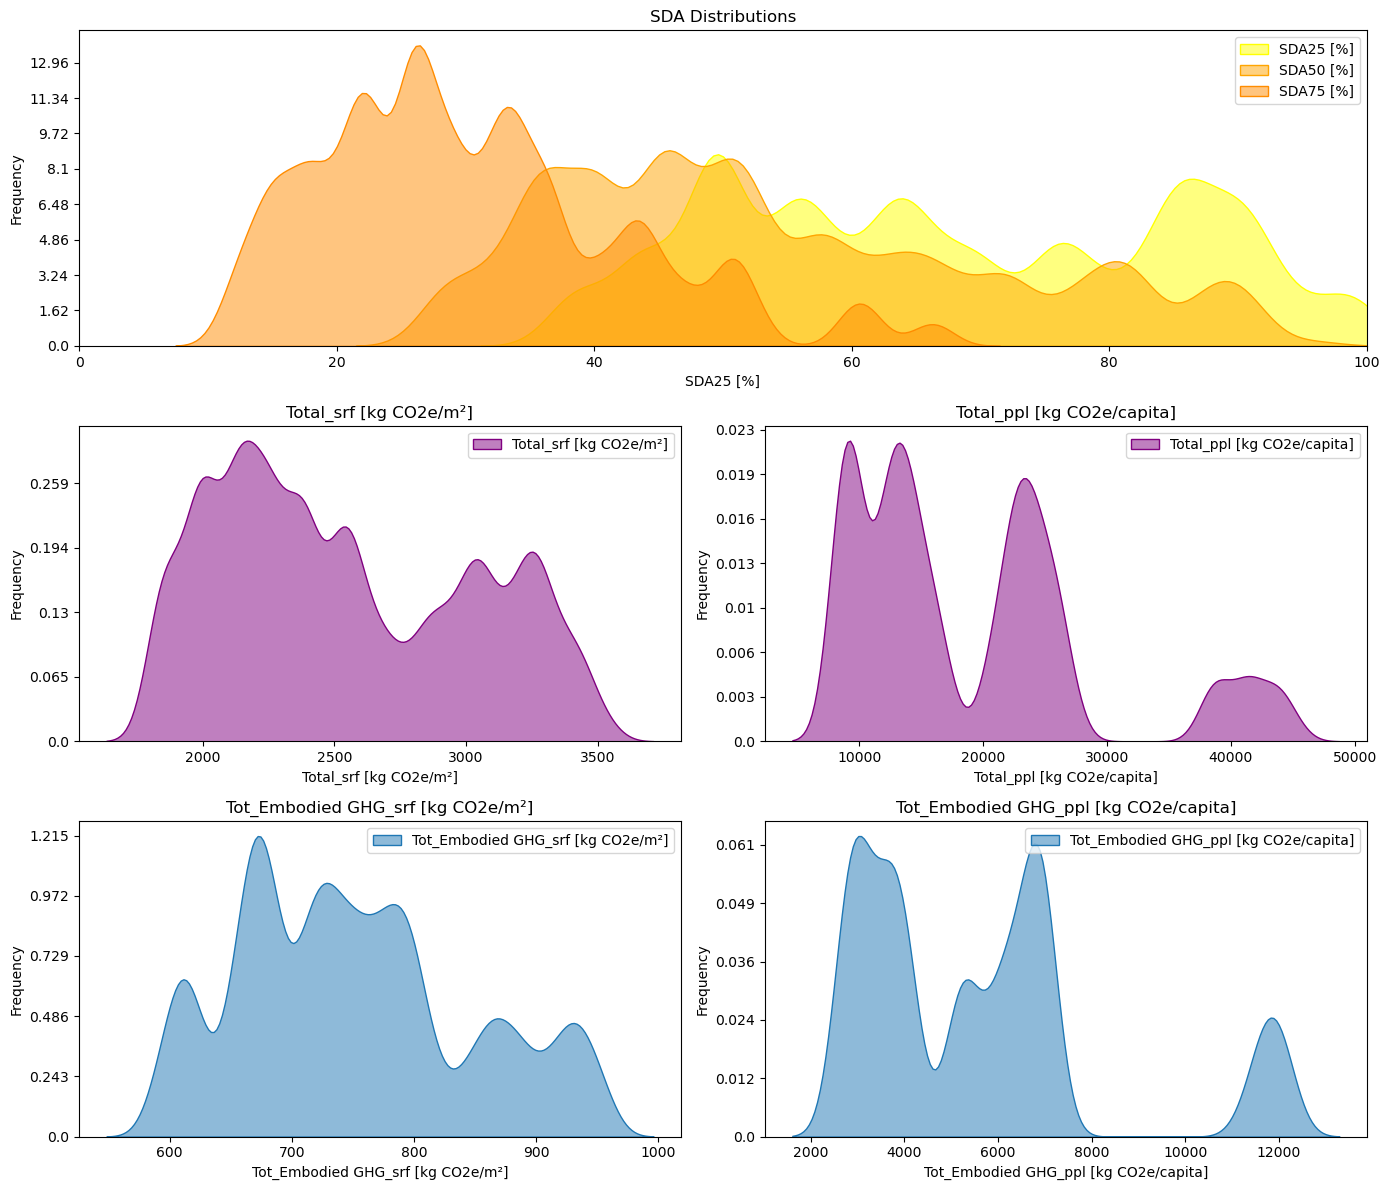

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

opacity = 0.5
kde_bw = 0.4

sda_cols = ['SDA25 [%]', 'SDA50 [%]', 'SDA75 [%]']
sda_colors = ['yellow', 'orange', 'darkorange']

op_cols = ['Total_srf [kg CO2e/m²]', 'Total_ppl [kg CO2e/capita]']
op_colors = ['purple', 'purple']

emb_cols = ['Tot_Embodied GHG_srf [kg CO2e/m²]', 'Tot_Embodied GHG_ppl [kg CO2e/capita]']
emb_colors = ['#1f77b4', '#1f77b4']  # blue tones

fig = plt.figure(figsize=(14, 12))
gs = GridSpec(3, 2, figure=fig)

# First row spans both columns
ax1 = fig.add_subplot(gs[0, :])
for col, color in zip(sda_cols, sda_colors):
    sns.kdeplot(sdaDF[col], ax=ax1, bw_adjust=kde_bw, fill=True, alpha=opacity, color=color, label=col, common_norm=False)
ax1.set_title("SDA Distributions")
ax1.legend()
ax1.set_xlim(0, 100)

# Second row, two columns
ax2 = fig.add_subplot(gs[1, 0])
sns.kdeplot(opDF[op_cols[0]], ax=ax2, bw_adjust=kde_bw, fill=True, alpha=opacity, color=op_colors[0], label=op_cols[0], common_norm=False)
ax2.set_title(op_cols[0])
ax2.legend()

ax3 = fig.add_subplot(gs[1, 1])
sns.kdeplot(opDF[op_cols[1]], ax=ax3, bw_adjust=kde_bw, fill=True, alpha=opacity, color=op_colors[1], label=op_cols[1], common_norm=False)
ax3.set_title(op_cols[1])
ax3.legend()

# Third row, two columns
ax4 = fig.add_subplot(gs[2, 0])
sns.kdeplot(embDF[emb_cols[0]], ax=ax4, bw_adjust=kde_bw, fill=True, alpha=opacity, color=emb_colors[0], label=emb_cols[0], common_norm=False)
ax4.set_title(emb_cols[0])
ax4.legend()

ax5 = fig.add_subplot(gs[2, 1])
sns.kdeplot(embDF[emb_cols[1]], ax=ax5, bw_adjust=kde_bw, fill=True, alpha=opacity, color=emb_colors[1], label=emb_cols[1], common_norm=False)
ax5.set_title(emb_cols[1])
ax5.legend(loc='upper right')

for ax, data in zip([ax1, ax2, ax3, ax4, ax5], [
    sdaDF['SDA25 [%]'],
    opDF['Total_srf [kg CO2e/m²]'],
    opDF['Total_ppl [kg CO2e/capita]'],
    embDF['Tot_Embodied GHG_srf [kg CO2e/m²]'],
    embDF['Tot_Embodied GHG_ppl [kg CO2e/capita]']
]):
    n = len(data.dropna())  # drop NaNs to get actual count
    yticks = ax.get_yticks()
    ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
    ax.set_ylabel("Frequency")


plt.tight_layout()
plt.show()


# Distribution - 2 rows

C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\392992656.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\392992656.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
C:\Users\mdasse\AppData\Local\Temp\ipykernel_30608\392992656.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])


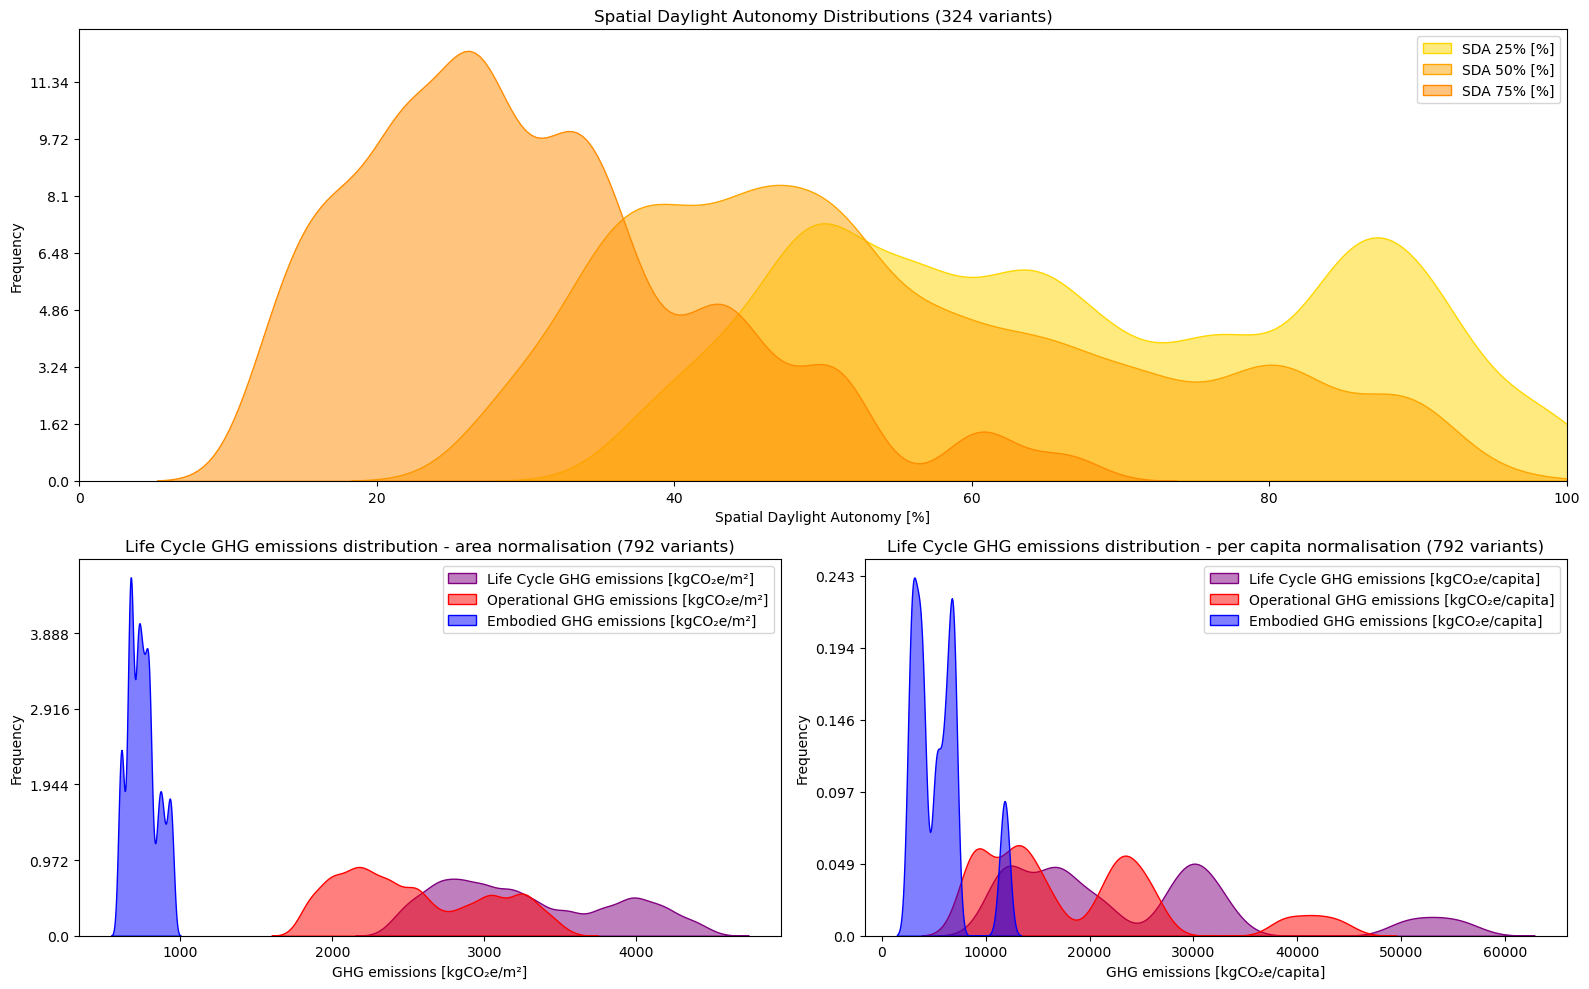

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE settings
opacity = 0.5
kde_bw = 0.6

# Colors
sda_colors = ['#FFD700', '#FFA500', '#FF8C00']  # yellow to dark orange
lc_colors = ['purple', 'red', 'blue']

# Prepare figure with 2 rows, 2 columns
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(nrows=2, ncols=2, height_ratios=[1.2, 1])

# First row (spans both columns)
ax0 = fig.add_subplot(gs[0, :])
sda_cols = ['SDA25 [%]', 'SDA50 [%]', 'SDA75 [%]']
legend_labels = {
    'SDA25 [%]': 'SDA 25% [%]',
    'SDA50 [%]': 'SDA 50% [%]',
    'SDA75 [%]': 'SDA 75% [%]'
}
for col, color in zip(sda_cols, sda_colors):
    sns.kdeplot(data=sdaDF[col], fill=True, alpha=opacity, bw_adjust=kde_bw, ax=ax0, label=legend_labels.get(col, col), color=color)
ax0.set_xlim(0, 100)
ax0.set_title("Spatial Daylight Autonomy Distributions (324 variants)")
ax0.legend()
ax0.set_xlabel('Spatial Daylight Autonomy [%]')

# Second row, left: surface-based
ax1 = fig.add_subplot(gs[1, 0])
srf_cols = ['LC GHG_srf [kg CO2e/m²]', 'Total_srf [kg CO2e/m²]', 'Tot_Embodied GHG_srf [kg CO2e/m²]']
legend_labels = {
    'LC GHG_srf [kg CO2e/m²]': 'Life Cycle GHG emissions [kgCO₂e/m²]',
    'Total_srf [kg CO2e/m²]': 'Operational GHG emissions [kgCO₂e/m²]',
    'Tot_Embodied GHG_srf [kg CO2e/m²]': 'Embodied GHG emissions [kgCO₂e/m²]'
}
for col, color in zip(srf_cols, lc_colors):
    sns.kdeplot(data=lcDF[col], fill=True, alpha=opacity, bw_adjust=kde_bw, ax=ax1, label=legend_labels.get(col, col), color=color)
ax1.set_title("Life Cycle GHG emissions distribution - area normalisation (792 variants)")
ax1.legend(loc='upper right')
ax1.set_xlabel('GHG emissions [kgCO₂e/m²]')

# Second row, right: per capita
ax2 = fig.add_subplot(gs[1, 1])
ppl_cols = ['LC GHG_ppl [kg CO2e/capita]', 'Total_ppl [kg CO2e/capita]', 'Tot_Embodied GHG_ppl [kg CO2e/capita]']
legend_labels = {
    'LC GHG_ppl [kg CO2e/capita]': 'Life Cycle GHG emissions [kgCO₂e/capita]',
    'Total_ppl [kg CO2e/capita]': 'Operational GHG emissions [kgCO₂e/capita]',
    'Tot_Embodied GHG_ppl [kg CO2e/capita]': 'Embodied GHG emissions [kgCO₂e/capita]'
}
for col, color in zip(ppl_cols, lc_colors):
    sns.kdeplot(data=lcDF[col], fill=True, alpha=opacity, bw_adjust=kde_bw, ax=ax2, label=legend_labels.get(col, col), color=color)
ax2.set_title("Life Cycle GHG emissions distribution - per capita normalisation (792 variants)")
ax2.legend(loc='upper right')
ax2.set_xlabel('GHG emissions [kgCO₂e/capita]')

for ax, data in zip([ax0, ax1, ax2], [
    sdaDF['SDA25 [%]'],
    lcDF['LC GHG_ppl [kg CO2e/capita]'],
    lcDF['LC GHG_ppl [kg CO2e/capita]']
]):
    n = len(data.dropna())  # drop NaNs to get actual count
    yticks = ax.get_yticks()
    ax.set_yticklabels([f"{round(y * n, 3)}" for y in yticks])
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

---

# LC x SDA

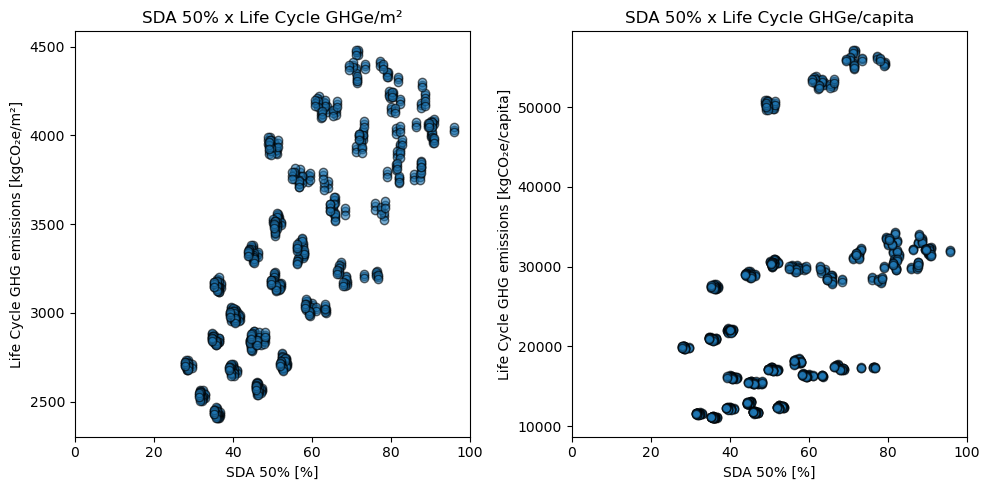

In [27]:
# Define LC metrics as columns
lc_columns = ['LC GHG_srf [kg CO2e/m²]', 'LC GHG_ppl [kg CO2e/capita]']
col_labels = ['LC GHG per m²', 'LC GHG per capita']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharex=True)

# Loop over the 3 LC metrics
for j, (lc_col, lc_title) in enumerate(zip(lc_columns, col_labels)):  
    ax = axes[j]  # Use 1D indexing since only 1 row
    ax.scatter(filled_sdaDF['SDA50 [%]'], lcDF[lc_col], alpha=0.6, edgecolors='k')
    ax.set_xlim(0, 100)

    ax.set_xlabel('SDA 50% [%]')

axes[0].set_ylabel('Life Cycle GHG emissions [kgCO₂e/m²]')
axes[0].set_title(r'SDA 50% x Life Cycle GHGe/m²')
axes[1].set_ylabel('Life Cycle GHG emissions [kgCO₂e/capita]')
axes[1].set_title(r'SDA 50% x Life Cycle GHGe/capita')

# Adjust layout
plt.tight_layout()
plt.show()

## Cluster Selection

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import numpy as np

%matplotlib qt

# Data setup
x = filled_sdaDF['SDA50 [%]'].values
y_srf = lcDF['LC GHG_srf [kg CO2e/m²]'].values
y_ppl = lcDF['LC GHG_ppl [kg CO2e/capita]'].values

points_srf = np.column_stack((x, y_srf))
points_ppl = np.column_stack((x, y_ppl))

# Initialize globals to hold selected dataframes
selected_df_srf = lcDF.iloc[[]].copy()
selected_df_ppl = lcDF.iloc[[]].copy()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sc1 = ax1.scatter(x, y_srf, alpha=0.6)
sc2 = ax2.scatter(x, y_ppl, alpha=0.6)
ax1.set_title('LC GHG per m²')
ax2.set_title('LC GHG per capita')
ax1.set_xlabel('SDA50 [%]')
ax2.set_xlabel('SDA50 [%]')
ax1.set_ylabel('GHG [kg CO2e/m²]')
ax2.set_ylabel('GHG [kg CO2e/capita]')

# Define separate callbacks
def onselect_srf(verts):
    global selected_df_srf
    path = Path(verts)
    mask = path.contains_points(points_srf)
    selected_df_srf = lcDF[mask].copy()
    print(f"{len(selected_df_srf)} points selected in SRF plot.")

def onselect_ppl(verts):
    global selected_df_ppl
    path = Path(verts)
    mask = path.contains_points(points_ppl)
    selected_df_ppl = lcDF[mask].copy()
    print(f"{len(selected_df_ppl)} points selected in PPL plot.")

# Activate LassoSelector on both axes
lasso_srf = LassoSelector(ax1, onselect_srf)
lasso_ppl = LassoSelector(ax2, onselect_ppl)

plt.show()


123 points selected in SRF plot.
171 points selected in PPL plot.
75 points selected in PPL plot.
51 points selected in PPL plot.


In [34]:
paramList = [
    'Length [m]', 'Width [m]', 'WWR [/]', 'Layout [/]', 'Orientation [/]',
    'Insulation [/]', 'Geometric Density [/]', 'Occupancy Density [m²/capita]'
]

# For SRF
valueDict_srf = {}
for param in paramList:
    valueDict_srf[param] = {}
    for value in sorted(lcDF[param].unique()):
        count = (selected_df_srf[param] == value).sum()
        valueDict_srf[param][value] = count

# For PPL
valueDict_ppl = {}
for param in paramList:
    valueDict_ppl[param] = {}
    for value in sorted(lcDF[param].unique()):
        count = (selected_df_ppl[param] == value).sum()
        valueDict_ppl[param][value] = count


In [44]:
sorted(lcDF['Occupancy Density [m²/capita]'].unique())

[0.078, 0.115, 0.126, 0.136, 0.185, 0.219]

In [35]:
import pprint
pprint.pprint(valueDict_srf)

{'Geometric Density [/]': {0.204: 30,
                           0.278: 21,
                           0.306: 0,
                           0.352: 72,
                           0.379: 0,
                           0.417: 0,
                           0.517: 0,
                           0.528: 0,
                           0.655: 0},
 'Insulation [/]': {0: 41, 1: 41, 2: 41},
 'Layout [/]': {0: 30, 1: 69, 2: 24},
 'Length [m]': {2.9: 0, 3.6: 0, 5.4: 123},
 'Occupancy Density [m²/capita]': {0.078: 0,
                                   0.115: 0,
                                   0.126: 30,
                                   0.136: 0,
                                   0.185: 21,
                                   0.219: 72},
 'Orientation [/]': {0: 30, 1: 27, 2: 36, 3: 30},
 'WWR [/]': {0.3: 12, 0.4: 60, 0.5: 51},
 'Width [m]': {3.4: 30, 5.0: 21, 6.6: 72}}


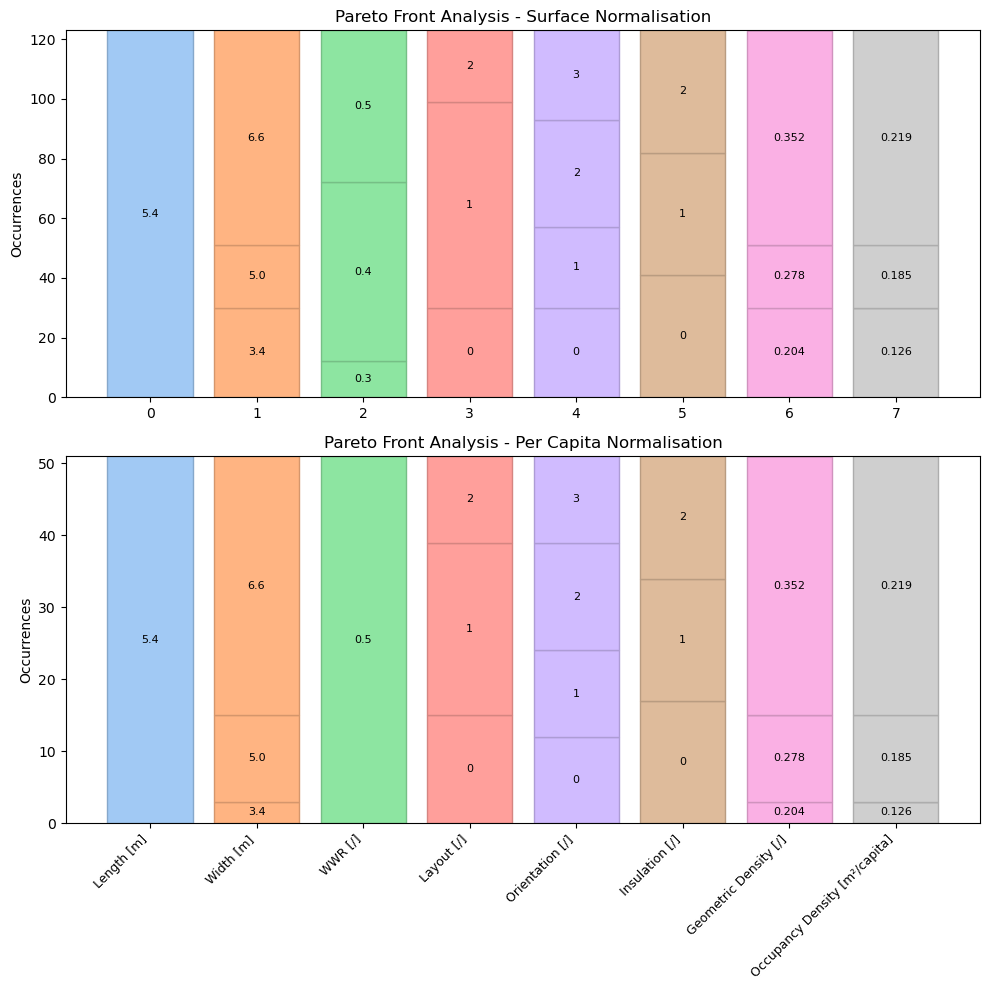

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns

# Optional in Jupyter
%matplotlib inline

# Function to darken a color
def darken_color(color, amount=1.2):
    c = mcolors.to_rgb(color)
    return tuple(max(0, min(1, c_i / amount)) for c_i in c)

# Use seaborn pastel palette for base colors
base_colors = sns.color_palette("pastel")
# Extend or cycle if fewer colors than params
params = list(valueDict_srf.keys())
param_colors = {param: base_colors[i % len(base_colors)] for i, param in enumerate(params)}

# Set up the plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharey=False)
dicts = [valueDict_srf, valueDict_ppl]
titles = ['Pareto Front Analysis - Surface Normalisation', 'Pareto Front Analysis - Per Capita Normalisation']

for ax, valueDict, title in zip(axes, dicts, titles):
    x = np.arange(len(params))
    bottoms = np.zeros(len(params))

    for param_idx, param in enumerate(params):
        base_color = param_colors[param]
        edge_color = darken_color(base_color)

        values = valueDict[param]
        for val, count in values.items():
            bar = ax.bar(
                x[param_idx],
                count,
                bottom=bottoms[param_idx],
                color=base_color,
                edgecolor=edge_color,
                linewidth=1,
            )

            if count > 0:
                ax.text(
                    x[param_idx],
                    bottoms[param_idx] + count / 2,
                    val,
                    ha='center', va='center',
                    fontsize=8, color='black'
                )

            bottoms[param_idx] += count

    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Occurrences")

# Add x labels
axes[1].set_xticks(np.arange(len(params)))
axes[1].set_xticklabels(params, fontsize=9, rotation=45, ha='right')

plt.tight_layout()
plt.show()


---

# OP vs EMB

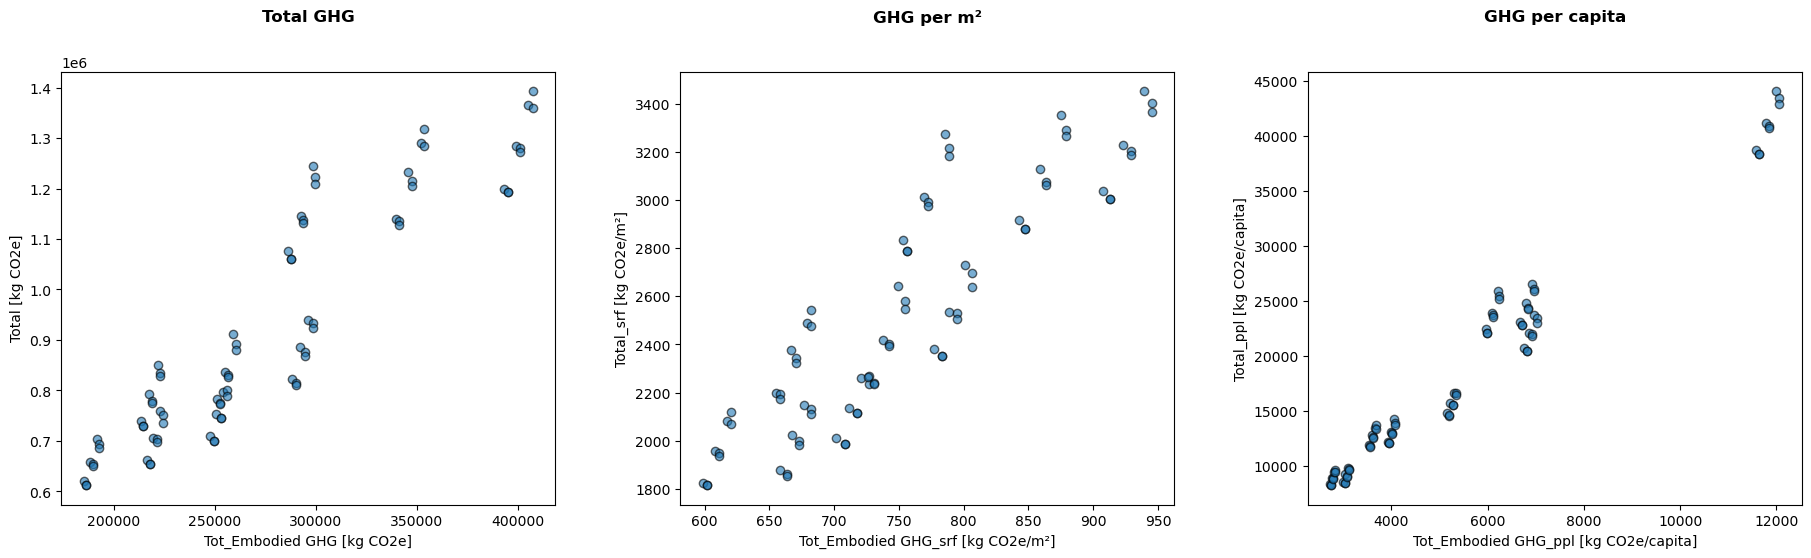

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create figure and 3 main axes for scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True, gridspec_kw={'wspace': 0.1})

# Column pairs: (x column, y column, title)
column_pairs = [
    ('Tot_Embodied GHG [kg CO2e]', 'Total [kg CO2e]', 'Total GHG'),
    ('Tot_Embodied GHG_srf [kg CO2e/m²]', 'Total_srf [kg CO2e/m²]', 'GHG per m²'),
    ('Tot_Embodied GHG_ppl [kg CO2e/capita]', 'Total_ppl [kg CO2e/capita]', 'GHG per capita')
]

for ax, (x_col, y_col, title) in zip(axes, column_pairs):
    x = embDF[x_col]
    y = opDF[y_col]

    # Scatter plot
    ax.scatter(x, y, alpha=0.6, edgecolors='k')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    # # Top histogram
    # ax_histx = inset_axes(ax, width="100%", height="40%", loc='upper center',
    #                       bbox_to_anchor=(0, 0.88, 1, 0.2),  # closer to top edge
    #                       bbox_transform=ax.transAxes, borderpad=0)
    # ax_histx.hist(x, bins=50, color='grey', alpha=0.5)
    # ax_histx.axis('off')

    # # Right histogram
    # ax_histy = inset_axes(ax, width="40%", height="100%", loc='center right',
    #                       bbox_to_anchor=(0.88, 0, 0.2, 1),  # closer to right edge
    #                       bbox_transform=ax.transAxes, borderpad=0)
    # ax_histy.hist(y, bins=50, orientation='horizontal', color='grey', alpha=0.5)
    # ax_histy.axis('off')

    # Title ABOVE histogram using the main figure
    ax.set_title("")  # Clear title on main Axes
    ax_title = inset_axes(ax, width="100%", height="10%", loc='upper center',
                          bbox_to_anchor=(0, 1.03, 1, 0.1), bbox_transform=ax.transAxes,
                          borderpad=0)
    ax_title.text(0.5, 0.5, title, ha='center', va='center', fontsize=12, weight='bold')
    ax_title.axis('off')

# Final layout
plt.show()


In [15]:
clusterDF = lcDF[lcDF['Tot_Embodied GHG [kg CO2e]'] < 125000]
paramList = ['Length [m]', 'Width [m]', 'WWR [/]', 'Layout [/]', 'Orientation [/]', 'Insulation [/]', 'Geometric Density [/]', 'Occupancy Density [m²/capita]']
valueDict = {}
for param in paramList:
    valueDict[param] = {}
    for value in sorted(lcDF[param].unique()):
        count = (clusterDF[param] == value).sum()
        valueDict[param][value] = count

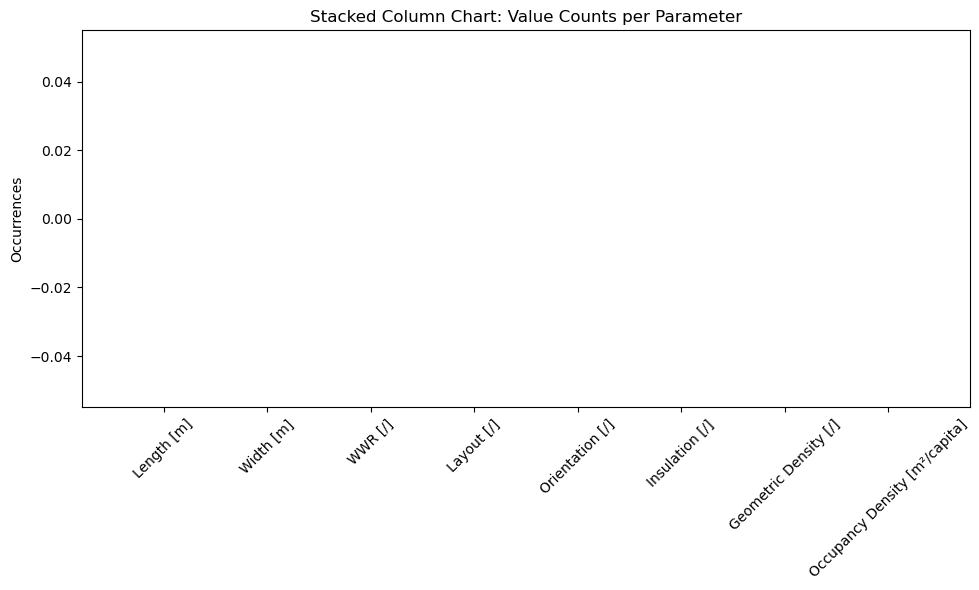

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Extract all unique values
all_values = sorted(set(v for param in valueDict.values() for v in param.keys()))
colors = plt.cm.tab20.colors
value_colors = {val: colors[i % len(colors)] for i, val in enumerate(all_values)}

# Setup bar positions
params = list(valueDict.keys())
x = np.arange(len(params))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(len(params))

for val in all_values:
    heights = [valueDict[param].get(val, 0) for param in params]

    bars = ax.bar(x, heights, bottom=bottoms, label=val, color=value_colors[val])

    for rect, height in zip(bars, heights):
        if height > 0:
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                rect.get_y() + height / 2,
                val,  # ← Show value name, not height
                ha='center', va='center',
                fontsize=9, color='white'
            )

    bottoms += heights

# Labels and legend
ax.set_xticks(x)
ax.set_xticklabels(params, fontsize=10, rotation=45)
ax.set_ylabel("Occurrences")
ax.set_title("Stacked Column Chart: Value Counts per Parameter")
# ax.legend(title="Values")

plt.tight_layout()
plt.show()


---

# Contributions

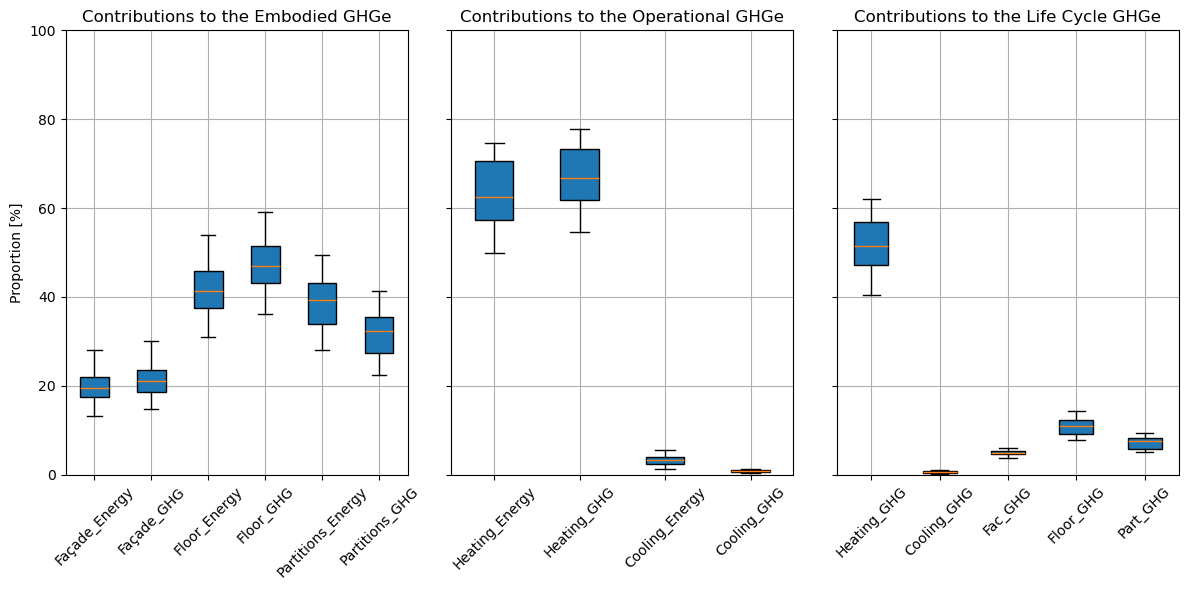

In [25]:
# Prepare data
group1 = [cleaned_embDF['Fac_EnergyProp [%]'], cleaned_embDF['Fac_GHGProp [%]'],
          cleaned_embDF['Floor_EnergyProp [%]'], cleaned_embDF['Floor_GHGProp [%]'],
          cleaned_embDF['Part_EnergyProp [%]'], cleaned_embDF['Part_GHGProp [%]']]

group2 = [cleaned_opDF['Heating_EnergyProp [%]'], cleaned_opDF['Heating_GHGProp [%]'],
          cleaned_opDF['Cooling_EnergyProp [%]'], cleaned_opDF['Cooling_GHGProp [%]']]

group3 = [lcDF['Heating_GHGProp [%]'], lcDF['Cooling_GHGProp [%]'],
          lcDF['Fac_GHGProp [%]'], lcDF['Floor_GHGProp [%]'], lcDF['Part_GHGProp [%]']]

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# First plot: Construction components
axes[0].boxplot(group1, patch_artist=True)
axes[0].set_xticklabels(['Façade_Energy', 'Façade_GHG', 'Floor_Energy', 'Floor_GHG', 'Partitions_Energy', 'Partitions_GHG'], rotation=45)
axes[0].set_title('Contributions to the Embodied GHGe')
axes[0].set_ylabel('Proportion [%]')
axes[0].grid(True)
axes[0].set_ylim(0, 100)

# Second plot: Heating & Cooling
axes[1].boxplot(group2, patch_artist=True)
axes[1].set_xticklabels(['Heating_Energy', 'Heating_GHG', 'Cooling_Energy', 'Cooling_GHG'], rotation=45)
axes[1].set_title('Contributions to the Operational GHGe')
axes[1].grid(True)
axes[1].set_ylim(0, 100)

# Third plot: GHG-only comparison
axes[2].boxplot(group3, patch_artist=True)
axes[2].set_xticklabels(['Heating_GHG', 'Cooling_GHG', 'Fac_GHG', 'Floor_GHG', 'Part_GHG'], rotation=45)
axes[2].set_title('Contributions to the Life Cycle GHGe')
axes[2].grid(True)
axes[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()

---

# Sensitivity

In [18]:
def Compute_Sensitivity(df, metricsList, paramList, uncountableParams):
    import pandas as pd
    import numpy as np
    import time

    # Step 1: Get unique values per parameter
    valueDict = {param: sorted(df[param].unique()) for param in paramList if param in df.columns}

    # Step 2: Setup output container
    metricsDict = {}

    for metric in metricsList:
        print(f'Processing {metric}')
        metricsDict[metric] = {}
        avg = df[metric].mean()

        metricDF = df[metric].copy()

        for param in paramList:
            print(f"Processing {param}")
            start = time.time()

            metricsDict[metric][param] = []

            if param not in df.columns:
                continue

            valueDF = pd.DataFrame()
            for value in valueDict[param]:
                subset = metricDF[df[param] == value].copy()
                valueDF[value] = subset.reset_index(drop=True)

            # Compute differences between consecutive values
            diffList = []
            for i in range(1, len(valueDict[param])):
                v1 = valueDict[param][i]
                v0 = valueDict[param][i - 1]
                colName = 'diff' + str(i)
                diffList.append(colName)
                if param in uncountableParams:
                    valueDF[colName] = abs(valueDF[v1] - valueDF[v0]) /avg *100
                else:
                    valueDF[colName] = (valueDF[v1] - valueDF[v0]) /avg *100
            if param in uncountableParams:
                diffList.append('diff0')
                valueDF['diff0'] = abs(valueDF[valueDict[param][0]] - valueDF[valueDict[param][len(valueDict[param])-1]]) /avg *100
            
            # print(valueDF.info())
            valueDF['meanDiff'] = valueDF[diffList].mean(axis=1)
            metricsDict[metric][param] = list(valueDF['meanDiff'])
            # print(len(metricsDict[metric][param]),end=', ')
            
            end = time.time()
            print(param, 'took', round(end-start,2), 'seconds')
            print('SensiList final length :',len(metricsDict[metric][param]))
            print()

    return metricsDict

In [19]:
lcMetricsList = ['LC GHG_srf [kg CO2e/m²]', 'LC GHG_ppl [kg CO2e/capita]']
sdaMetricsList = ['SDA50 [%]']
paramList = ['Length [m]', 'Width [m]', 'WWR [/]', 'Layout [/]', 'Orientation [/]', 'Insulation [/]', 'Geometric Density [/]', 'Occupancy Density [m²/capita]']
uncountableParams = ['Layout [/]', 'Orientation [/]', 'Insulation [/]']
lcMetricsDict = Compute_Sensitivity(lcDF, lcMetricsList, paramList, uncountableParams)
sdaMetricsDict = Compute_Sensitivity(cleaned_sdaDF, sdaMetricsList, paramList, uncountableParams)
metricsDict = sdaMetricsDict | lcMetricsDict

Processing LC GHG_srf [kg CO2e/m²]
Processing Length [m]
Length [m] took 0.0 seconds
SensiList final length : 324

Processing Width [m]
Width [m] took 0.0 seconds
SensiList final length : 324

Processing WWR [/]
WWR [/] took 0.0 seconds
SensiList final length : 324

Processing Layout [/]
Layout [/] took 0.0 seconds
SensiList final length : 324

Processing Orientation [/]
Orientation [/] took 0.0 seconds
SensiList final length : 243

Processing Insulation [/]
Insulation [/] took 0.0 seconds
SensiList final length : 324

Processing Geometric Density [/]
Geometric Density [/] took 0.01 seconds
SensiList final length : 108

Processing Occupancy Density [m²/capita]
Occupancy Density [m²/capita] took 0.0 seconds
SensiList final length : 108

Processing LC GHG_ppl [kg CO2e/capita]
Processing Length [m]
Length [m] took 0.0 seconds
SensiList final length : 324

Processing Width [m]
Width [m] took 0.0 seconds
SensiList final length : 324

Processing WWR [/]
WWR [/] took 0.0 seconds
SensiList fin

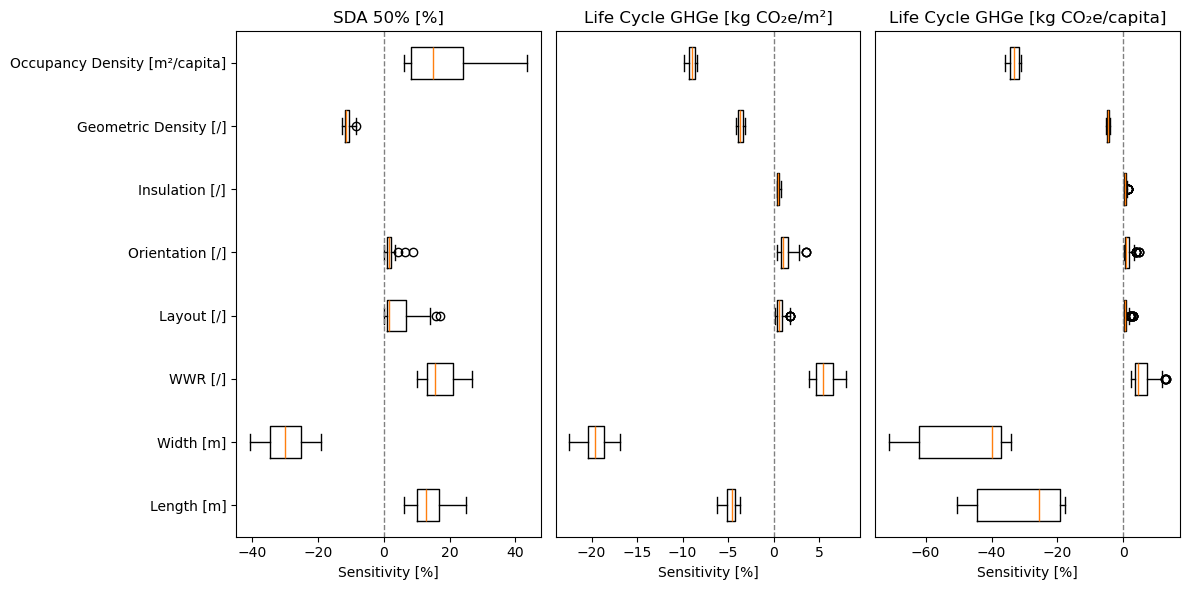

In [40]:
import matplotlib.pyplot as plt

# Assuming your dictionary is named metricsDict
metrics = list(metricsDict.keys())
n_metrics = len(metrics)

# Set up the figure with one subplot per metric, arranged horizontally
fig, axes = plt.subplots(1, n_metrics, figsize=(4 * n_metrics, 6), sharex=False)

# If only one metric, axes is not a list — make it one
if n_metrics == 1:
    axes = [axes]

for i, (ax, metric) in enumerate(zip(axes, metrics)):
    data = metricsDict[metric]
    
    # Collect boxplot data and labels
    box_data = [data[param] for param in data]
    labels = list(data.keys())

    # Horizontal boxplots
    ax.boxplot(box_data, vert=False, tick_labels=labels)
    # ax.set_xlim(-100, 100)
    ax.set_xlabel("Sensitivity [%]")
    ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    # Remove y-axis ticks and labels for other plots
    if i != 0:
        ax.tick_params(axis='y', left=False, labelleft=False)

axes[0].set_title('SDA 50% [%]')
axes[1].set_title('Life Cycle GHGe [kg CO₂e/m²]')
axes[2].set_title('Life Cycle GHGe [kg CO₂e/capita]')


plt.tight_layout()
plt.show()